### Мельниченко Даниил Владимирович, 3 группа, 4 курс, ФПМИ
### Лабораторная работа №2
### Алгоритм распознавания №1 (непрерывные данные)

Датасет: https://archive.ics.uci.edu/ml/datasets/seeds

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import *
from ipywidgets import FloatSlider, interactive, Layout
from sklearn.decomposition import KernelPCA
%run classifier.py

In [2]:
def load_dataset(filepath="seeds_dataset.txt"):
    X = []
    y = []
    with open(filepath, 'r') as file:
        for line in file:
            data = line.split()
            assert len(data) == 8
            X.append(list(map(float, data[:7])))
            y.append(int(data[7]))
    return (X, y)
    
X, y = load_dataset()

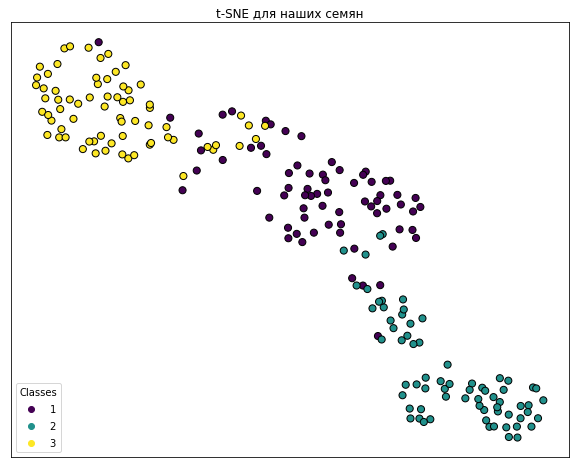

In [10]:
X_embedded = TSNE(n_iter=3000).fit_transform(X)

plt.figure(1, figsize=(10, 8))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, zorder=10, s=50, edgecolor='black')
plt.xticks(())
plt.yticks(())
plt.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
plt.title("t-SNE для наших семян")
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=2, stratify=y_train)

classifier = Classifier(dist_function=np.linalg.norm).fit(X_train, y_train)

y_pred = classifier.predict(X_val)
print("Accuracy на валидационной выборке:", accuracy_score(y_val, y_pred))
y_pred = classifier.predict(X_test)
print("Accuracy на тестовой выборке:", accuracy_score(y_test, y_pred))

Accuracy на валидационной выборке: 0.9117647058823529
Accuracy на тестовой выборке: 0.9047619047619048


In [12]:
pca = KernelPCA(n_components=2, random_state=0, kernel='cosine').fit(X)
X_embedded_pca = pca.fit_transform(X)

In [13]:
mapper = {
    1: 'red',
    2: 'lime',
    3: 'yellow',
}
colors = np.array([
    mapper[y_val]
    for y_val in y
])

names = [
    'area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel',
    'asymmetry_coefficient', 'length_of_kernel_groove'
]
style = {'description_width': '150px'}
layout = Layout(width='40%')
sliders = [
    FloatSlider(
        value=(min_value + max_value) / 2, min=min_value, max=max_value,
        description=names[idx], style=style, step=0.001, layout=layout)
    for idx, (min_value, max_value) in enumerate(zip(np.amin(np.array(X), axis=0), np.amax(np.array(X), axis=0)))
]

def f(**kwargs):
    global pca
    global X_embedded_pca
    global y
    global colors
    global mapper
    
    X_cur = list(kwargs.values())
    X_transformed = pca.transform([X_cur])
    y_pred = classifier.predict([X_cur])[0]
    
    plt.figure(2, figsize=(10, 7))
    scatter1 = \
        plt.scatter(
            X_embedded_pca[:, 0], X_embedded_pca[:, 1], c=colors, zorder=10, s=50, edgecolor='black', marker='o')
    scatter2 = \
        plt.scatter(
            X_transformed[:, 0], X_transformed[:, 1], c=mapper[y_pred], zorder=10, s=300,
            edgecolor='black', marker='*')
    plt.xticks(())
    plt.yticks(())
    plt.show()
    

kwargs = {'w{}'.format(i):slider for i, slider in enumerate(sliders)}
interactive_plot = interactive(f, **kwargs)
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=15.885, description='area', layout=Layout(width='40%'), max=21.18, min…